In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import lightgbm as lgb

c:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [125]:
# read the data from /input/train.csv
data = pd.read_csv("train.csv")

In [126]:
data.columns.tolist()

['id',
 'Mean_Integrated',
 'SD',
 'EK',
 'Skewness',
 'Mean_DMSNR_Curve',
 'SD_DMSNR_Curve',
 'EK_DMSNR_Curve',
 'Skewness_DMSNR_Curve',
 'Class']

In [127]:
X = data.drop(['Class', 'id'], axis=1)
#X_top = X.drop(['source',  'EK_DMSNR_Curve', 'Mean_DMSNR_Curve'], axis=1)
y = data['Class']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LGBM

In [246]:
model = lgb.LGBMClassifier(n_estimators=512, max_depth=4, min_split_gain=1., min_child_samples=512, learning_rate=0.1, random_state=42)
# fit the model
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)

In [247]:
# log loss
logloss = log_loss(y_test, preds)
print("Test log loss: ", logloss, "\n")

# make training predictions
train_probs = model.predict_proba(X_train)

# calculate log loss
train_loss = log_loss(y_train, train_probs)
print("Train log loss: ", train_loss, "\n")


Test log loss:  0.0323712192042319 

Train log loss:  0.02739880203217335 



0.02743317008899377

## Submission Pipeline

In [248]:
# read the data from sample_submission.csv
submission = pd.read_csv("sample_submission.csv")

In [249]:
submission.head()

,id,Class
0,117564,0.5
1,117565,0.5
2,117566,0.5
3,117567,0.5
4,117568,0.5


In [250]:
type(X_test)

pandas.core.frame.DataFrame

In [251]:
# read the real test data from test.csv
test_data = pd.read_csv("test.csv")

In [252]:
test_data.head()

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781
1,117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822
2,117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499
3,117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240
4,117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775


In [253]:
X_testtest = test_data.drop(['id'], axis=1)
#X_testtest['source'] = 0

In [254]:
ID_test = test_data.id

In [255]:
# final fit with entire training set
model.fit(X, y)

LGBMClassifier(max_depth=4, min_child_samples=512, min_split_gain=1.0,
               n_estimators=512, random_state=42)

In [256]:
preds = model.predict_proba(X_testtest)

In [257]:
preds

array([[9.99882192e-01, 1.17807627e-04],
       [9.99125605e-01, 8.74395003e-04],
       [9.99891465e-01, 1.08535105e-04],
       ...,
       [9.99846988e-01, 1.53012255e-04],
       [9.23309819e-01, 7.66901808e-02],
       [1.88425297e-02, 9.81157470e-01]])

In [258]:
preds=  preds[:,1]

In [259]:
# Save test predictions to file
submission = pd.DataFrame({'id': ID_test,
                       'Class': preds})
submission.to_csv('submission_lgbm.csv', index=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

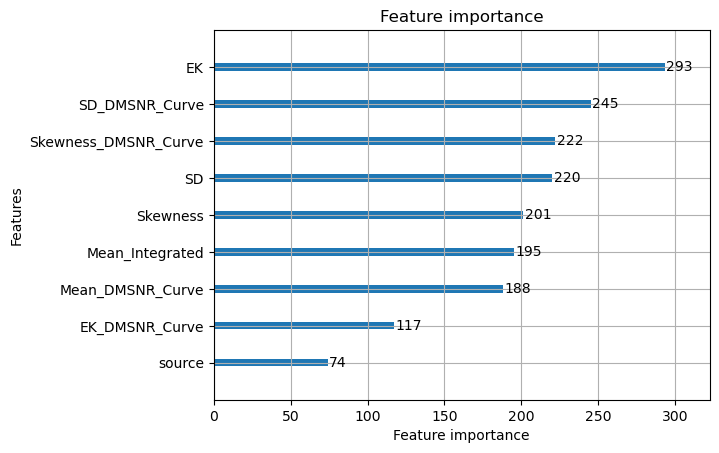

In [22]:
# plot the feature importance
lgb.plot_importance(model, max_num_features=10)
